In [5]:
# %pip install -qqq selenium --progress-bar off       
# %pip install -qqq selenium-Screenshot --progress-bar off
# %pip install -qqq transformers==4.20.1 --progress-bar off
# %pip install -qqq pytorch-lightning --progress-bar off
# %pip install -qqq pytesseract --progress-bar off
# %pip install -qqq pillow --progress-bar off

In [1]:
import transformers
from transformers import LayoutLMv3FeatureExtractor, LayoutLMTokenizerFast, LayoutLMv3Processor, LayoutLMv3ForSequenceClassification
import selenium
from selenium import webdriver
from Screenshot import Screenshot
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd 
from selenium.webdriver.chrome.service import Service

import sys
from pathlib import Path



In [7]:
# Use Path to define the directory and glob to list files 
# files = list(Path("dataset/documents").glob("*"))
# print(files)

files = list(Path("dataset/documents").glob("*"))

In [8]:
# name conversion to lower case and removal of the blank spaces

for dir in list(Path("dataset/documents").glob("*")):
    dir.rename(str(dir).lower().replace(" ", "_"))

In [9]:
list(Path("dataset/documents").glob("*"))

[WindowsPath('dataset/documents/balance_sheets'),
 WindowsPath('dataset/documents/cash_flow'),
 WindowsPath('dataset/documents/income_statement'),
 WindowsPath('dataset/documents/notes'),
 WindowsPath('dataset/documents/others')]

In [10]:
# converting the html directory file to images
for dir in Path("dataset/documents").glob("*"):
    image_dir = Path(f"images/{dir.name}")
    image_dir.mkdir(exist_ok=True, parents=True)

In [11]:
list(Path("images").glob("*"))

[WindowsPath('images/balance_sheets'),
 WindowsPath('images/cash_flow'),
 WindowsPath('images/income_statement'),
 WindowsPath('images/notes'),
 WindowsPath('images/others')]

In [12]:
# # since all the files are in the html format so u need to initialize the selenium driver 
# # to get the html document into images

# from selenium.webdriver.chrome.service import Service

# # # creating function
# def create_chrome_driver() -> webdriver.Chrome:

#     chrome_options = webdriver.ChromeOptions()
#     chrome_options.add_argument("--headless")
#     chrome_options.add_argument("--no-sandbox")
#     chrome_options.add_argument("--diable-dev-shm-usage")

#     return webdriver.Chrome("chromedriver", options=chrome_options)

# driver = create_chrome_driver()
# driver

In [13]:
# driver = create_chrome_driver()
# driver

In [14]:
# # because the above code was not working

# import os
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service

# # Add the directory containing chromedriver.exe to the PATH
# chrome_driver_path = r'E:\thesis\youtube\venelin\chromedriver-win64\chromedriver-win64'
# os.environ['PATH'] += os.pathsep + chrome_driver_path

# def create_chrome_driver() -> webdriver.Chrome:
#     chrome_options = webdriver.ChromeOptions()
#     chrome_options.add_argument("--headless")
#     chrome_options.add_argument("--no-sandbox")
#     chrome_options.add_argument("--disable-dev-shm-usage")

#     # Specify the path to the Chrome binary if necessary
#     chrome_binary_path = r'C:\Program Files\Google\Chrome\Application\chrome.exe'  # Update this path if necessary
#     chrome_options.binary_location = chrome_binary_path

#     # Print debug information about the environment
#     print("PATH:", os.environ['PATH'])
#     chrome_driver_exe = os.path.join(chrome_driver_path, 'chromedriver.exe')
#     print("ChromeDriver Service Path:", chrome_driver_exe)
#     print("Chrome Binary Path:", chrome_binary_path)

#     # Initialize ChromeDriver with the service using the exact path
#     service = Service(chrome_driver_exe)
    
#     # Print debug information about service
#     print("Service Command:", service.command_line_args())
    
#     try:
#         driver = webdriver.Chrome(service=service, options=chrome_options)
#     except Exception as e:
#         print("An error occurred while creating the Chrome driver:", str(e))
#         raise
    
#     return driver

# # Initialize the driver
# driver = create_chrome_driver()
# print(driver)


In [15]:
def create_chrome_driver() -> webdriver.Chrome:
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Specify the path to the Chrome binary
    chrome_binary_path = r'C:\Program Files\Google\Chrome\Application\chrome.exe'
    chrome_options.binary_location = chrome_binary_path

    # Specify the path to the chromedriver executable
    chrome_driver_exe = r'E:\thesis\youtube\venelin\chromedriver-win64\chromedriver-win64\chromedriver.exe'

    # Initialize ChromeDriver with the service using the exact path
    service = Service(chrome_driver_exe)

    # Print debug information
    print("ChromeDriver Service Path:", chrome_driver_exe)
    print("Chrome Binary Path:", chrome_binary_path)

    try:
        driver = webdriver.Chrome(service=service, options=chrome_options)
    except Exception as e:
        print("An error occurred while creating the Chrome driver:", str(e))
        raise

    return driver


In [16]:
driver = create_chrome_driver()
driver


ChromeDriver Service Path: E:\thesis\youtube\venelin\chromedriver-win64\chromedriver-win64\chromedriver.exe
Chrome Binary Path: C:\Program Files\Google\Chrome\Application\chrome.exe


<selenium.webdriver.chrome.webdriver.WebDriver (session="e5d201e02d6568ebfe04b9147bbb2d6c")>

In [17]:
def convert_html_to_image(driver: webdriver.Chrome, file_path: Path, images_dir: Path) -> Path:
    driver.get(f"file:///{file_path.resolve()}")

    # shot = Screenshot.Screenshot()
    # img_url = shot.full_Screenshot(
    #     driver,
    #     save_path=str(images_dir / file_path.parent.name),
    #     image_name=file_path.with_suffix(".png").name
    # )


    shot = Screenshot.Screenshot()
    img_dir = images_dir / file_path.parent.name
    img_dir.mkdir(parents=True, exist_ok=True)
    img_name = file_path.with_suffix(".png").name
    img_path = img_dir / img_name
    img_url = shot.full_screenshot(driver, save_path=str(img_dir), image_name=img_name)



    return Path(img_url)


In [18]:
document_paths = list(Path("dataset\documents").glob("*/*"))[:10]       # only 10 first
document_paths

[WindowsPath('dataset/documents/balance_sheets/18320959_3.html'),
 WindowsPath('dataset/documents/balance_sheets/18391125_2.html'),
 WindowsPath('dataset/documents/balance_sheets/18442877_5.html'),
 WindowsPath('dataset/documents/balance_sheets/18445487_2.html'),
 WindowsPath('dataset/documents/balance_sheets/18445494_3.html'),
 WindowsPath('dataset/documents/balance_sheets/18448274_5.html'),
 WindowsPath('dataset/documents/balance_sheets/18448275_3.html'),
 WindowsPath('dataset/documents/balance_sheets/18448275_9.html'),
 WindowsPath('dataset/documents/balance_sheets/18456477_2.html'),
 WindowsPath('dataset/documents/balance_sheets/18456478_2.html')]

In [19]:
# Example of converting HTML documents to images
document_paths = list(Path("dataset/documents").glob("*/*"))[:10]
images_dir = Path("images")

for doc_path in tqdm(document_paths):
    img_path = convert_html_to_image(driver, doc_path, images_dir)
    print(f"Saved screenshot to {img_path}")

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:04<00:42,  4.69s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18320959_3.png


 20%|██        | 2/10 [00:09<00:35,  4.49s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18391125_2.png


 30%|███       | 3/10 [00:12<00:27,  3.93s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18442877_5.png


 40%|████      | 4/10 [00:16<00:24,  4.09s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18445487_2.png


 50%|█████     | 5/10 [00:20<00:20,  4.16s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18445494_3.png


 60%|██████    | 6/10 [00:25<00:16,  4.22s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18448274_5.png


 70%|███████   | 7/10 [00:29<00:12,  4.25s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18448275_3.png


 80%|████████  | 8/10 [00:33<00:08,  4.27s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18448275_9.png


 90%|█████████ | 9/10 [00:38<00:04,  4.30s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18456477_2.png


100%|██████████| 10/10 [00:41<00:00,  4.16s/it]

Saved screenshot to e:\thesis\youtube\venelin\images\balance_sheets\18456478_2.png


In [20]:
image_paths = list(Path("images").glob("*\*"))
image_paths

[WindowsPath('images/balance_sheets/18320959_3.png'),
 WindowsPath('images/balance_sheets/18391125_2.png'),
 WindowsPath('images/balance_sheets/18442877_5.png'),
 WindowsPath('images/balance_sheets/18445487_2.png'),
 WindowsPath('images/balance_sheets/18445494_3.png'),
 WindowsPath('images/balance_sheets/18448274_5.png'),
 WindowsPath('images/balance_sheets/18448275_3.png'),
 WindowsPath('images/balance_sheets/18448275_9.png'),
 WindowsPath('images/balance_sheets/18456477_2.png'),
 WindowsPath('images/balance_sheets/18456478_2.png')]

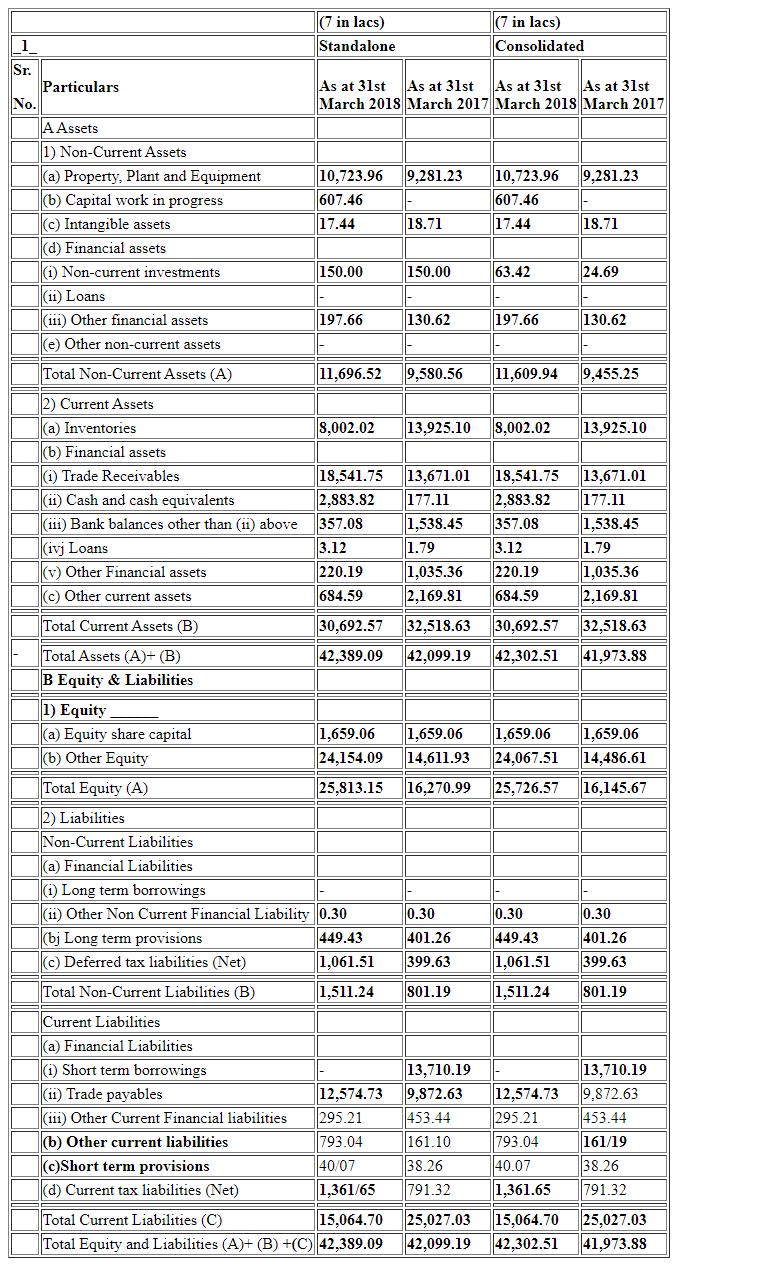

In [21]:
from PIL import Image

image = Image.open(image_paths[0]).convert("RGB")
image

### getting all the features

In [22]:
from transformers import LayoutLMv3FeatureExtractor, LayoutLMv3TokenizerFast, LayoutLMv3Processor

# Initialize feature extractor
feature_extractor = LayoutLMv3FeatureExtractor(apply_ocr=True, ocr_lang="eng")

# Initialize tokenizer
tokenizer = LayoutLMv3TokenizerFast.from_pretrained("microsoft/layoutlmv3-base")

# Initialize processor
processor = LayoutLMv3Processor(feature_extractor, tokenizer)


In [23]:
encoding = processor(
    image,
    max_length=512,
    padding="max_length",
    truncation=True,
    return_tensors='pt'
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask', 'bbox', 'pixel_values'])

In [24]:
print(f"""
input_ids: {list(encoding["input_ids"].squeeze().shape)}
word boxes: {list(encoding["bbox"].squeeze().shape)}
imagedata: {list(encoding["pixel_values"].squeeze().shape)}
image size: {image.size}
      """)


input_ids: [512]
word boxes: [512, 4]
imagedata: [3, 224, 224]
image size: (763, 1266)
      


In [25]:
feature_extractor

LayoutLMv3FeatureExtractor {
  "apply_ocr": true,
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "LayoutLMv3FeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "ocr_lang": "eng",
  "resample": 2,
  "size": 224
}

In [26]:
features = feature_extractor(image)

In [27]:
features.keys()

# always check that the word count must be equal to the bounding boxes  "bbox"

dict_keys(['pixel_values', 'words', 'boxes'])

In [28]:
print(f"""
word boxes: {len(encoding["bbox"][0])}
imagedata: {list(encoding["pixel_values"][0].shape)}
word boxes: {len(encoding["bbox"][0])}
      """)


word boxes: 512
imagedata: [3, 224, 224]
word boxes: 512
      


In [29]:
image_data = features["pixel_values"][0]
image_data.shape

(3, 224, 224)

In [30]:
image_data = image_data.transpose(1,2,0)
image_data.shape

(224, 224, 3)

In [31]:
image_data[0][0]

array([1., 1., 1.], dtype=float32)

In [32]:
image_data= np.uint8(image_data*255)
image_data[0][0]

array([255, 255, 255], dtype=uint8)

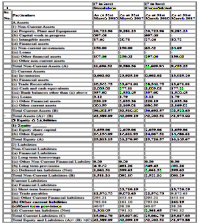

In [33]:
Image.fromarray(image_data, mode="RGB")

In [34]:
words = features["words"][0]
bounding_boxes = features["boxes"][0]

print(words[:5])
print(bounding_boxes[:5])

['[(7', 'in', 'lacs)', '[C7', 'im']
[[418, 12, 435, 23], [441, 12, 457, 21], [463, 12, 503, 23], [648, 12, 665, 23], [671, 12, 688, 21]]


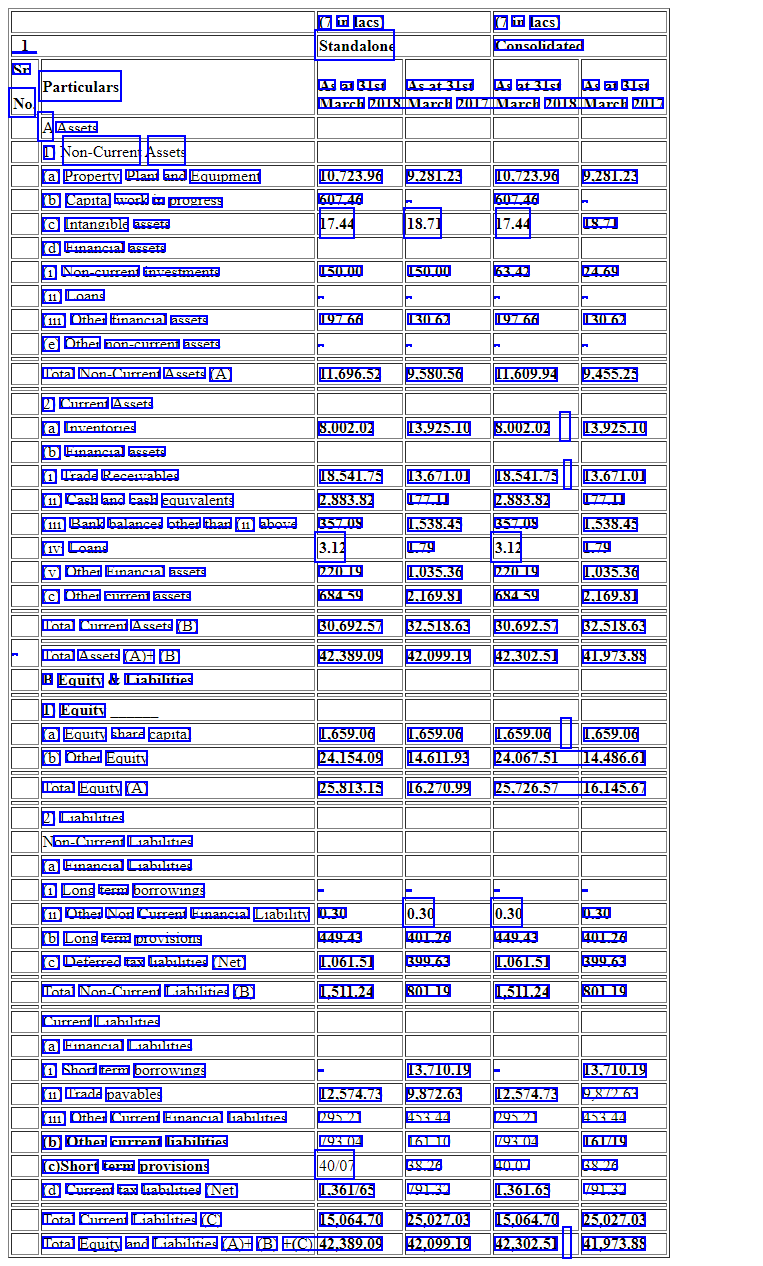

In [35]:
image = Image.open(image_paths[0]).convert("RGB")

width_scale = image.width/1000
height_scale = image.height/1000

draw = ImageDraw.Draw(image)

for bbox in bounding_boxes:
    draw.rectangle(
        [
            bbox[0]*width_scale,
            bbox[1]*height_scale,
            bbox[2]*width_scale,
            bbox[3]*height_scale,
        ],
        outline="blue",
        width = 2
    )

image

In [36]:
tokenizer

PreTrainedTokenizerFast(name_or_path='microsoft/layoutlmv3-base', vocab_size=50265, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)})

In [37]:
encoding= tokenizer(
    text = words,
    boxes = bounding_boxes,
    max_length=512,
    padding="max_length",
    truncation=True,
    return_tensors='pt'
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask', 'bbox'])

In [38]:
tokens = tokenizer.convert_ids_to_tokens(
    encoding["input_ids"][0],
    skip_special_tokens = True
)

print(tokens[:20])

['Ġ[(', '7', 'Ġin', 'Ġl', 'acs', ')', 'Ġ[', 'C', '7', 'Ġim', 'Ġl', 'acs', ')', 'ĠLa', 'Ġ[', 'St', 'andal', 'one', 'Ġ[', 'Cons']


In [39]:
# the above output is not making any sense so make one

tokenizer.convert_tokens_to_string(tokens[:20])

' [(7 in lacs) [C7 im lacs) La [Standalone [Cons'

In [40]:
model = LayoutLMv3ForSequenceClassification.from_pretrained("microsoft/layoutlmv3-base")

Some weights of LayoutLMv3ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
model.config

LayoutLMv3Config {
  "_name_or_path": "microsoft/layoutlmv3-base",
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "input_size": 224,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_2d_position_embeddings": 1024,
  "max_position_embeddings": 514,
  "max_rel_2d_pos": 256,
  "max_rel_pos": 128,
  "model_type": "layoutlmv3",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "patch_size": 16,
  "rel_2d_pos_bins": 64,
  "rel_pos_bins": 32,
  "second_input_size": 112,
  "shape_size": 128,
  "text_embed": true,
  "torch_dtype": "float32",
  "transformers_version": "4.20.1",
  "type_vocab_size": 1,
  "visual_embed": true,
  "vocab_size": 50265
}

In [42]:
encoding= processor(
    image,
    max_length=512,
    padding="max_length",
    truncation=True,
    return_tensors='pt'
)

output = model(**encoding)

e:\thesis\youtube\venelin\env\lib\site-packages\transformers\modeling_utils.py:812: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [43]:
output.logits

tensor([[0.0137, 0.0828]], grad_fn=<AddmmBackward0>)